In [1]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [2]:
data=pd.read_csv('train.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df = data.drop_duplicates()
df.shape
#As we can see there are no duplicates

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#we can drop 'Cabin' because almost all of its values are unknown
#also can drop 'PassengerId,Name,Ticket,Embarked,Fare' 
#because it does not provide us with important information to know if you survive
data = data.drop(['Cabin','PassengerId','Name','Ticket','Embarked','Fare'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [6]:
#now we need fill de null values
#check median
age_median = data['Age'].median()
age_median

28.0

In [7]:
#check values
data['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [8]:
#As it is a good value with respect to the others, we use it to fill in the nulls.
data['Age'].fillna(age_median, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 41.9+ KB


In [9]:
#Let's take the years already completed and eliminate the fractional part
data['Age'] = data['Age'].astype(int)

In [10]:
data['Age'].value_counts()

28    204
24     31
22     27
30     27
18     26
     ... 
12      1
66      1
53      1
80      1
74      1
Name: Age, Length: 71, dtype: int64

In [11]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22,1,0
1,1,1,female,38,1,0
2,1,3,female,26,0,0
3,1,1,female,35,1,0
4,0,3,male,35,0,0
...,...,...,...,...,...,...
886,0,2,male,27,0,0
887,1,1,female,19,0,0
888,0,3,female,28,1,2
889,1,1,male,26,0,0


In [12]:
#transform 'Sex' to Numeric
def sex_numeric(x):
    if x in ['male']:
        return 1
    else:
        return 0

data['Sex']=data['Sex'].apply(sex_numeric)
data['Sex'].value_counts()

1    577
0    314
Name: Sex, dtype: int64

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>]], dtype=object)

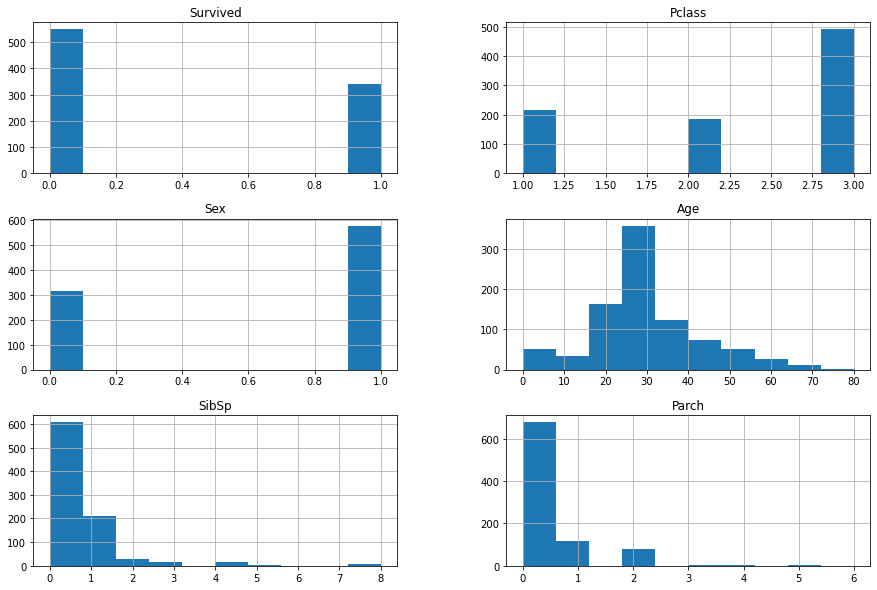

In [13]:
data.hist(figsize=(15,10))

In [14]:
#Split data and select our target
X = data.drop(['Survived'],axis=1) 
y = data['Survived']

In [15]:
#Check the correlation between the vaariables
# Calcule Correlation Matrix
corre_matrix=X.corr()
corre_matrix

,Pclass,Sex,Age,SibSp,Parch
Pclass,1.000000,0.131900,-0.339999,0.083081,0.018443
Sex,0.131900,1.000000,0.080750,-0.114631,-0.245489
Age,-0.339999,0.080750,1.000000,-0.233066,-0.172745
SibSp,0.083081,-0.114631,-0.233066,1.000000,0.414838
Parch,0.018443,-0.245489,-0.172745,0.414838,1.000000


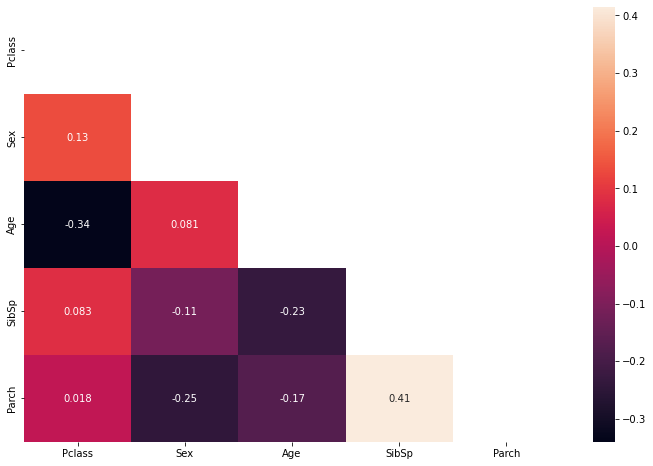

In [16]:
mask=np.zeros_like(corre_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax= plt.subplots(figsize=(12,8))
ax= sns.heatmap(corre_matrix, mask=mask, annot=True)

In [17]:
#according to the graph there seems to be no correlation between the columns

#now, before applying the training model, we could use some scaling method for our numeric variables, 
#although we can also try that first